In [163]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random
# para gerar o grafico no browser
%matplotlib inline
!git clone http://github.com/rodolfojbrandao/PHD
%cd PHD
!ls

Cloning into 'PHD'...
remote: Counting objects: 4120, done.
remote: Compressing objects: 100% (3774/3774), done.
remote: Total 4120 (delta 314), reused 4101 (delta 301), pack-reused 0
Receiving objects: 100% (4120/4120), 46.61 MiB | 26.34 MiB/s, done.
Resolving deltas: 100% (314/314), done.
Checking out files: 100% (3989/3989), done.
/content/PHD/PHD/PHD/PHD/PHD/PHD/PHD/PHD/PHD/PHD/PHD/PHD/PHD/PHD/PHD/PHD
dados.csv	liggghts-variables.py  Python	  ReposeAngleANN.csv
data-filter.py	mixingindex.py	       Queue.py   ReposeAngleANN.xlsx
GPU.py		optimization.py        README.md  ReposeAngle.ipynb


In [164]:
# leitura dos dados
DAT=pd.read_csv("ReposeAngleANN.csv")
print(DAT.head())

     D     Rho  Mspp  Mrpp  Mspw  Mrpw  Epp  Epw  Inferior  Superior
0  4.0  4000.0   0.3  0.03   0.3  0.03  0.8  0.8    24.455    20.785
1  4.0  4000.0   0.3  0.03   0.3  0.06  0.8  0.5    24.840    21.535
2  4.0  4000.0   0.3  0.03   0.6  0.03  0.8  0.5    25.680    21.455
3  4.0  4000.0   0.3  0.03   0.6  0.06  0.8  0.8    24.735    22.405
4  4.0  4000.0   0.3  0.06   0.3  0.03  0.5  0.8    26.640    22.310


In [0]:
# separa as colunas de interesse
Index=[0,1,2,3,4,5,6,7,8,9]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()

In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [169]:
# separa os dados em treino e teste
train=[]
test=[]
train=DAT.sample(frac=0.8,random_state=None).copy() # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index).copy()
print(train.head())

           D       Rho      Mspp      Mrpp      Mspw      Mrpw       Epp  \
61  0.486704  0.486703  0.486703  0.486697 -0.486703  0.486697  0.486703   
12 -0.486704 -0.486703  0.486703  0.486697 -0.486703 -0.486697  0.486703   
36  0.486704 -0.486703 -0.486703  0.486697 -0.486703 -0.486697  0.486703   
42  0.486704 -0.486703  0.486703 -0.486697  0.486703 -0.486697  0.486703   
9  -0.486704 -0.486703  0.486703 -0.486697 -0.486703  0.486697 -0.486703   

         Epw  Inferior  Superior  
61 -0.486703  0.752141  0.404099  
12  0.486703  0.524433  0.377824  
36 -0.486703  0.312846  0.039411  
42  0.486703  0.332997  0.160273  
9  -0.486703  0.270529  0.454545  


In [0]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1,2,3,4,5,6,7]]
x_test=test.iloc[:,[0,1,2,3,4,5,6,7]]
X_OLD=DAT_OLD.iloc[:,[0,1,2,3,4,5,6,7]]

In [0]:
# obtem as variaveis dependentes (treino e teste)
Index=[8,9]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]

In [0]:
def rede(i,j):
    clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,
                       hidden_layer_sizes=(i),random_state=j)
    return clf

In [173]:
N=20
M=100
test=Original(y_test,Y_OLD)
resist_obs_test=[]
resist_obs_train=[]
resist_obs_test=test['Superior'].copy()
Melhor=1e99
ir=0
jr=0
for i in range(1,N):
    for j in range(0,M):
        col_names=list(y_train)
        clf=rede(i,j)
        clf.fit(x_train, y_train)
        y_calc_train=[]
        y_calc_test=[]
        y_calc_train=clf.predict(x_train)
        y_calc_test=clf.predict(x_test)
        y_calc_train=pd.DataFrame(y_calc_train)
        y_calc_test=pd.DataFrame(y_calc_test)
        y_calc_train.columns = col_names
        y_calc_test.columns = col_names
        y_calc_train=Original(y_calc_train,Y_OLD)
        y_calc_test=Original(y_calc_test,Y_OLD)
        resist_calc_train=[]
        resist_calc_test=[]
        resist_calc_train=y_calc_train['Superior'].copy()
        resist_calc_test=y_calc_test['Superior'].copy()
        mse=mean_squared_error(resist_obs_test,resist_calc_test)
        R2=r2_score(resist_obs_test,resist_calc_test)
        print("Neuronios=",i,"Seed=",j,"MSE teste=",mse,"R^2 teste=",R2)
        if(mse<Melhor):
            Melhor=mse.copy()
            ix=i
            jx=j
            R2r=R2
            resist_calc_train_top = resist_calc_train.copy()
            resist_obs_test_top = resist_obs_test.copy()
            resist_calc_test_top = resist_calc_test.copy()
            
print("\n Melhor resposta:")
print("Neuronios=",ix,"Seed=",jx,"MSE teste=",Melhor,"R^2 teste=",R2r)

train=Original(y_train,Y_OLD)
resist_obs_train_top=train['Superior'].copy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Neuronios= 1 Seed= 0 MSE teste= 1.2832264809096667 R^2 teste= 0.593767518974252
Neuronios= 1 Seed= 1 MSE teste= 1.2687075041751312 R^2 teste= 0.5983638081161691
Neuronios= 1 Seed= 2 MSE teste= 1.2851697878902084 R^2 teste= 0.5931523240512635
Neuronios= 1 Seed= 3 MSE teste= 1.271638270035834 R^2 teste= 0.5974360122012539
Neuronios= 1 Seed= 4 MSE teste= 1.2768761452254673 R^2 teste= 0.5957778520360432
Neuronios= 1 Seed= 5 MSE teste= 1.276263633772226 R^2 teste= 0.5959717554903504
Neuronios= 1 Seed= 6 MSE teste= 1.2739447765379517 R^2 teste= 0.5967058387885349
Neuronios= 1 Seed= 7 MSE teste= 1.2784136447579928 R^2 teste= 0.5952911240429994
Neuronios= 1 Seed= 8 MSE teste= 1.268116664321725 R^2 teste= 0.5985508509672236
Neuronios= 1 Seed= 9 MSE teste= 1.2656081800578909 R^2 teste= 0.5993449647119689
Neuronios= 1 Seed= 10 MSE teste= 1.2670467498856937 R^2 teste= 0.5988895550091837
Neuronios= 1 Seed= 11 MSE teste= 1.2734647184352021 R^2 teste= 0.5968578113335359
Neuronios= 1 Seed= 12 MSE test

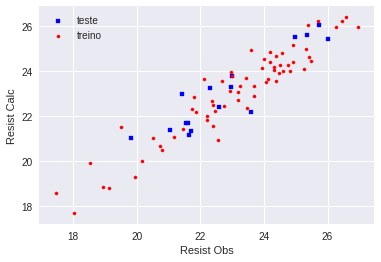

In [174]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)#mostra dois graficos sob o mesmo eixo 
ax1.scatter(resist_obs_test_top,resist_calc_test_top, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train_top,resist_calc_train_top, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Resist Calc')
plt.xlabel('Resist Obs')
plt.show()